In [10]:
# 이미지가 어떤 숫자인지를 예측하는 모델

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [11]:
tf.set_random_seed(777)  # for reproducibility

In [12]:
from tensorflow.examples.tutorials.mnist import input_data
# mnist에 대한 data를 가져옴

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost= 2.679232785
Epoch: 0002 cost= 1.052170996
Epoch: 0003 cost= 0.847184835
Epoch: 0004 cost= 0.743576370
Epoch: 0005 cost= 0.677962761
Epoch: 0006 cost= 0.630725496
Epoch: 0007 cost= 0.595462632
Epoch: 0008 cost= 0.567392548
Epoch: 0009 cost= 0.543759434
Epoch: 0010 cost= 0.524655325
Epoch: 0011 cost= 0.508302199
Epoch: 0012 cost= 0.493571092
Epoch: 0013 cost= 0.481034114
Epoch: 0014 cost= 0.469995647
Epoch: 0015 cost= 0.459452075
Learning finished
Accuracy:  0.8892
Label: [4]
Prediction: [4]


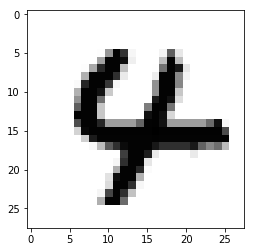

In [14]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10
# Mnist data image의 모양 28 * 28 임
X = tf.placeholder(tf.float32, [None, 784])
# 0-9 이므로 10개의 class
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

hypothesis = tf.nn.softmax(tf.matmul(X, W)+b)
cost = tf.reduce_mean(-tf.reduce_sum(Y *tf.log(hypothesis), axis = 1)) # 축 1로 해서 합을 구하고 평균을 냄
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# 모델 테스트
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.arg_max(Y, 1))
# 정확도 계산
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

training_epochs = 15 # 1 epoch => 전체 데이터사이즈만큼을 한번 학습시킨것
batch_size = 100 # 한번에 못하므로 배치사이즈만큼 나눠서

with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size) # iteration을 몇번 돌까? => 전체사이즈 / 배치사이즈
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size) # 100개의 x와 y training data가 읽어짐
            c, _ = sess.run([cost, optimizer], feed_dict = {X:batch_xs, Y:batch_ys})
            avg_cost += c / total_batch
    
        print('Epoch:', '%04d' % (epoch + 1), 'cost=', '{:.9f}'.format(avg_cost))
    print("Learning finished")
        
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels})) 
    # test =>학습에 한번도 사용되지 않은 data
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction:", sess.run(tf.argmax(hypothesis, 1), feed_dict = {X:mnist.test.images[r:r + 1]}))

    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()